In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Chemin vers le fichier CSV
file_path = '/kaggle/input/house-rent-dataset/House_Rent_Dataset.csv'

# Lire le dataset
df = pd.read_csv(file_path,sep=',')

In [27]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**data cleaning**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [29]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [30]:
 df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [31]:
df.duplicated().sum()

0

In [32]:
df.shape

(4746, 12)

In [33]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


**Data visualization**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

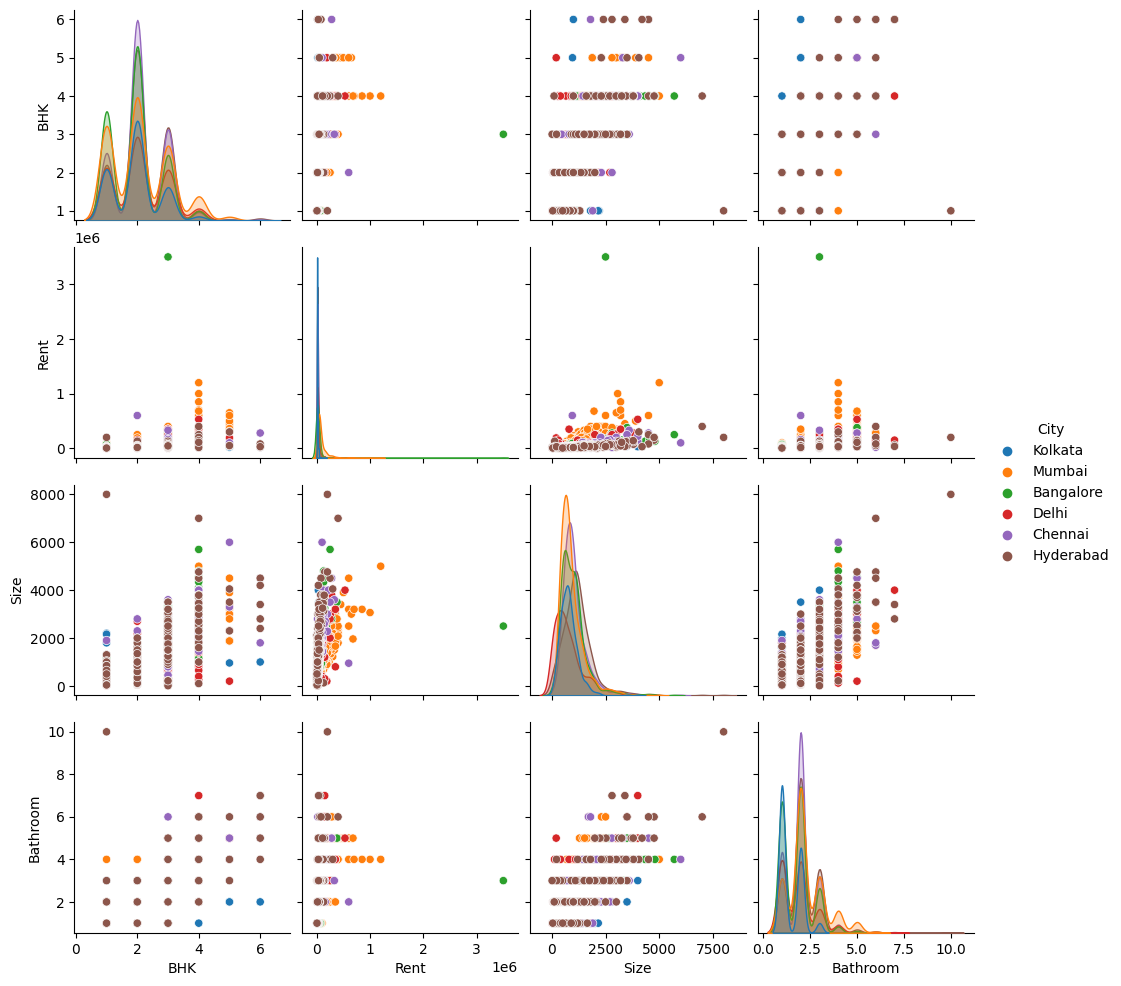

In [34]:
sns.pairplot(df,hue='City')

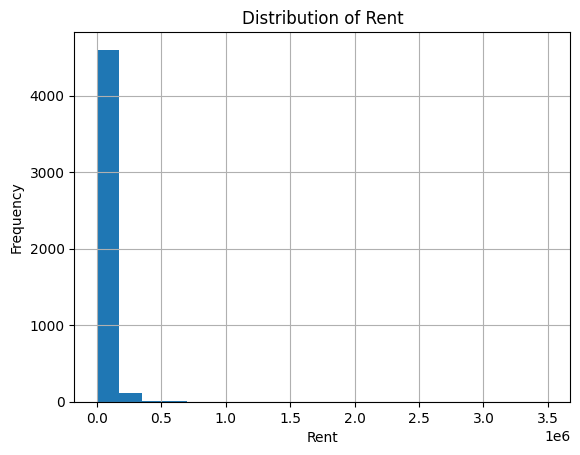

In [35]:
import matplotlib.pyplot as plt

# Distribution des valeurs de la caractéristique 'Rent'
df['Rent'].hist(bins=20)
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Distribution of Rent')
plt.show()

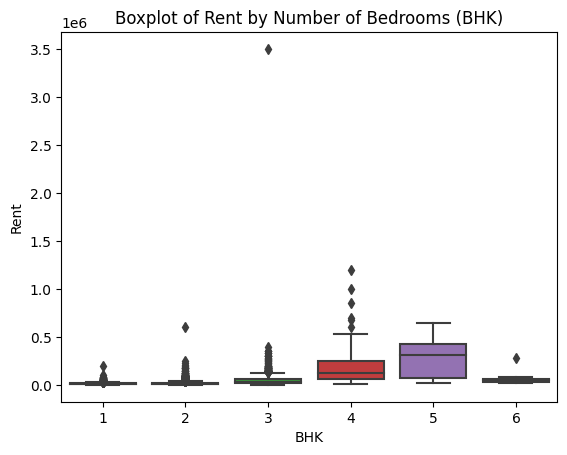

In [36]:
import seaborn as sns

# Comparaison de la distribution des loyers en fonction du nombre de chambres (BHK)
sns.boxplot(x='BHK', y='Rent', data=df)
plt.title('Boxplot of Rent by Number of Bedrooms (BHK)')
plt.show()


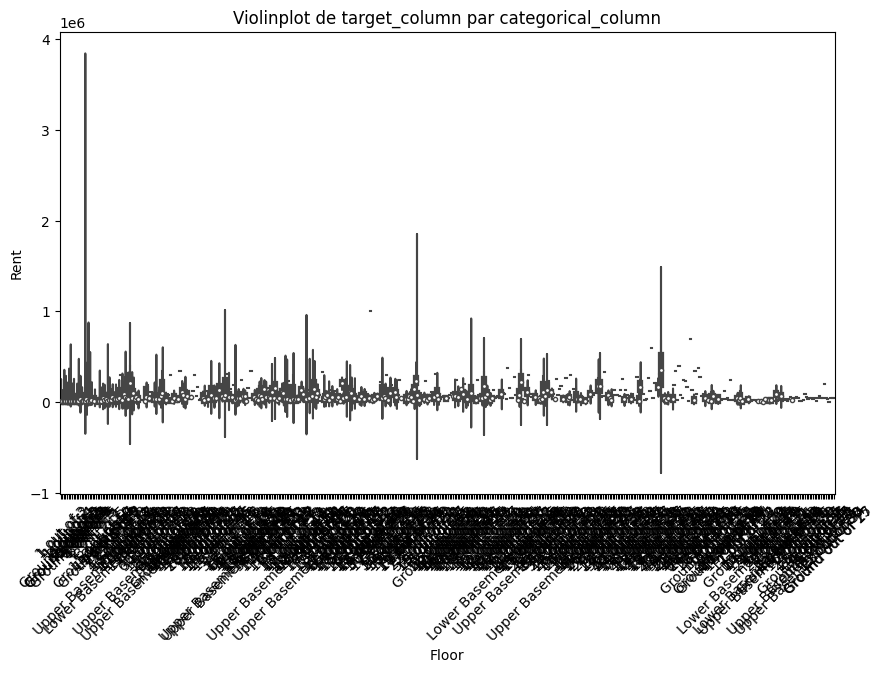

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Floor', y='Rent', data=df)
plt.title('Violinplot de target_column par categorical_column')
plt.xticks(rotation=45)
plt.show()


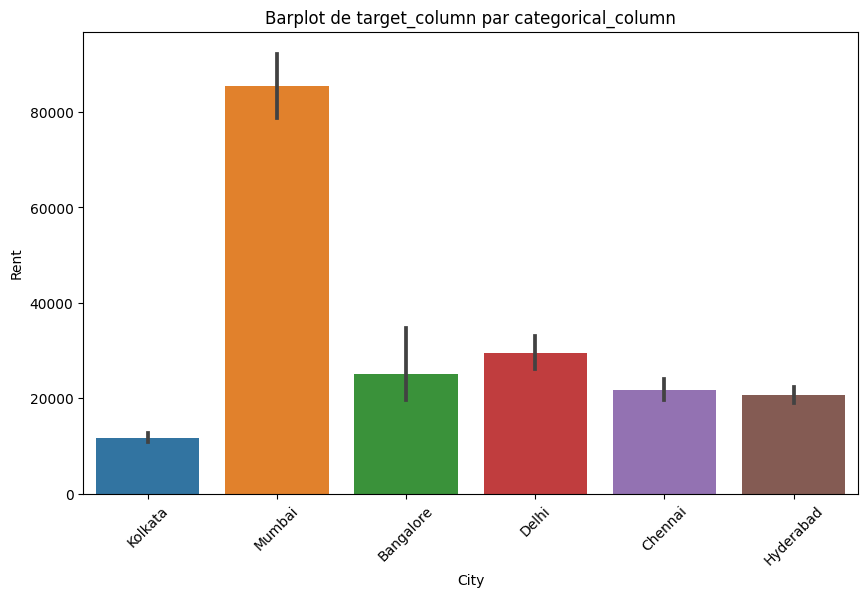

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Rent', data=df)
plt.title('Barplot de target_column par categorical_column')
plt.xticks(rotation=45)
plt.show()


Bathroom
1      11862.162144
2      25043.538193
3      63176.698264
7      81666.666667
4     167846.153846
6     177500.000000
10    200000.000000
5     252350.000000
Name: Rent, dtype: float64


<Axes: xlabel='Bathroom'>

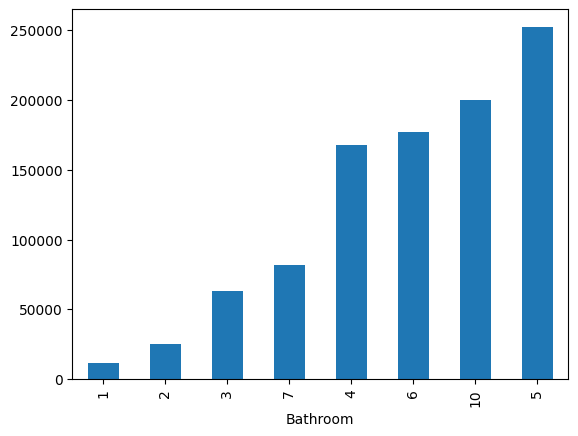

In [39]:
mean_rent_ofCities = df.groupby('Bathroom')['Rent'].mean().sort_values()
print(mean_rent_ofCities)
mean_rent_ofCities.plot(kind="bar")

In [42]:
numrical_data=df.select_dtypes(include='number')
df_corr=numrical_data.corr()

In [43]:
numrical_data.columns

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

<Axes: >

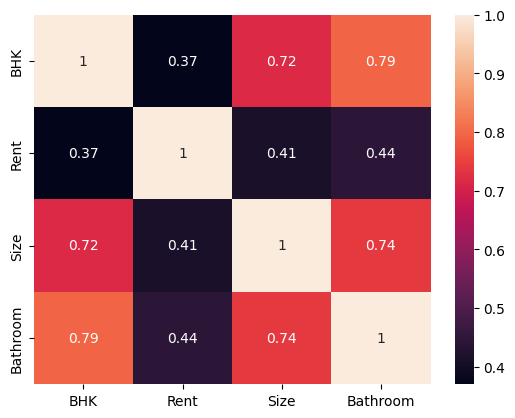

In [44]:
sns.heatmap(df_corr,annot=True) #interpretaion de la multicolinearite entre les colonnes numeriques

In [45]:
df=df.drop('BHK',axis=1)

In [46]:
df=df.drop('Bathroom',axis=1)

In [47]:
df=df.drop('Area Locality',axis=1)

In [48]:
df=df.drop('Floor',axis=1)


In [49]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['Anneé'] = df['Posted On'].dt.year
df=df.drop('Posted On',axis=1)


In [50]:
df=df.drop('Furnishing Status',axis=1)

In [51]:
df.head()

,Rent,Size,Area Type,City,Tenant Preferred,Point of Contact,Anneé
0,10000,1100,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
1,20000,800,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
2,17000,1000,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
3,10000,800,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
4,7500,850,Carpet Area,Kolkata,Bachelors,Contact Owner,2022


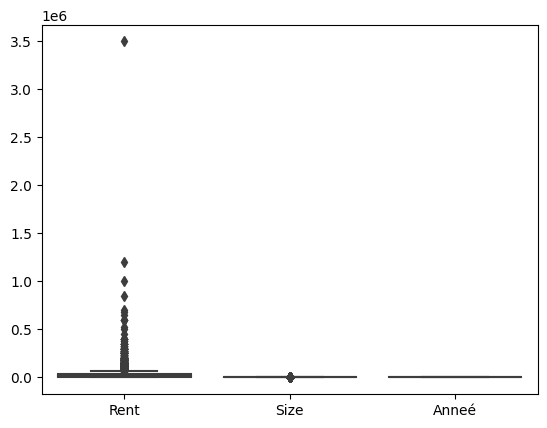

In [52]:
ax = sns.boxplot(data=df, orient="v")

In [53]:
x=df.drop('Rent',axis=1)
y=df['Rent']

In [54]:
# Vérifiez les shapes de x et y
print(x.shape)
print(y.shape)

(4746, 6)
(4746,)


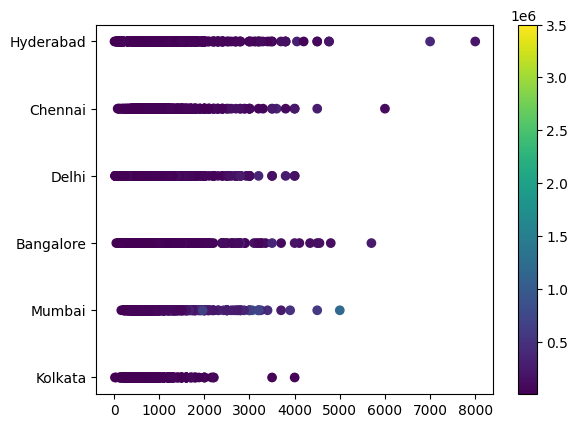

In [55]:
plt.scatter(x['Size'],x['City'],c=y)
plt.colorbar()
plt.show()


**Data Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [57]:
x.shape


(4746, 6)

In [58]:
y.shape

(4746,)

In [59]:
x['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [60]:
x['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [61]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [62]:

x.head()

,Size,Area Type,City,Tenant Preferred,Point of Contact,Anneé
0,1100,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
1,800,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
2,1000,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
3,800,Super Area,Kolkata,Bachelors/Family,Contact Owner,2022
4,850,Carpet Area,Kolkata,Bachelors,Contact Owner,2022


In [63]:
categorical_column_ordinal=['Tenant Preferred','Area Type']
categorical_column_nominal=['Point of Contact','City']

In [64]:
le = LabelEncoder()
for col in categorical_column_ordinal:
  x[col] = le.fit_transform(x[col])

In [65]:
x.head()

,Size,Area Type,City,Tenant Preferred,Point of Contact,Anneé
0,1100,2,Kolkata,1,Contact Owner,2022
1,800,2,Kolkata,1,Contact Owner,2022
2,1000,2,Kolkata,1,Contact Owner,2022
3,800,2,Kolkata,1,Contact Owner,2022
4,850,1,Kolkata,0,Contact Owner,2022


In [66]:
# Initialiser OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Utilisez drop='first' pour éviter la colinéarité

# Appliquer l'encodage OneHot
encoded_columns = encoder.fit_transform(x[categorical_column_nominal])

# Créer des noms de colonnes encodées
encoded_column_names = encoder.get_feature_names_out(categorical_column_nominal)

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

# Concaténer les colonnes encodées avec le DataFrame original (en supprimant les colonnes d'origine)
x_encoded = pd.concat([x.drop(categorical_column_nominal, axis=1), encoded_df], axis=1)


In [67]:
x_encoded.head()

,Size,Area Type,Tenant Preferred,Anneé,Point of Contact_Contact Builder,Point of Contact_Contact Owner,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,1100,2,1,2022,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,800,2,1,2022,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1000,2,1,2022,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,800,2,1,2022,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,850,1,0,2022,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [68]:
x=x_encoded

In [69]:
y.head()

0    10000
1    20000
2    17000
3    10000
4     7500
Name: Rent, dtype: int64

**Data splitting**

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
x_train.shape

(3796, 11)

**Modelling**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV


In [74]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [75]:
regressor.coef_ #voir les coiefficients

array([ 5.18975324e+01, -3.10077398e+03, -3.92536135e+03, -1.18234311e-10,
        1.87093785e+04, -9.76751834e+03, -5.39445156e+03,  1.22387005e+04,
       -1.44598604e+04, -3.56163420e+03,  5.74742672e+04])

In [76]:
regressor.intercept_ #voir l'intercept

-9381.621731011437

In [77]:
y_pred=regressor.predict(x_test) #prediction

In [78]:
# Calcul de la Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Définition de la fonction pour calculer la Root Mean Squared Error (RMSE)
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Calcul du RMSE
rmse_value = rmse(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse_value}")

# Calcul de la Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcul du R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 1906587374.7642474
Root Mean Squared Error (RMSE): 43664.48642505998
Mean Absolute Error (MAE): 22443.16109970102
R2 Score: 0.5216047793096545


In [79]:
# Performance sur les données d'entraînement
y_train_pred = regressor.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Performance sur les données de test
y_test_pred = regressor.predict(x_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Entraînement MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Entraînement MSE: 4804373138.914578
Test MSE: 1906587374.7642474


In [80]:
coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Size,5.189753e+01
Area Type,-3.100774e+03
Tenant Preferred,-3.925361e+03
Anneé,-1.182343e-10
Point of Contact_Contact Builder,1.870938e+04
Point of Contact_Contact Owner,-9.767518e+03
City_Chennai,-5.394452e+03
City_Delhi,1.223870e+04
City_Hyderabad,-1.445986e+04
City_Kolkata,-3.561634e+03


In [ ]:
from sklearn.model_selection import GridSearchCV


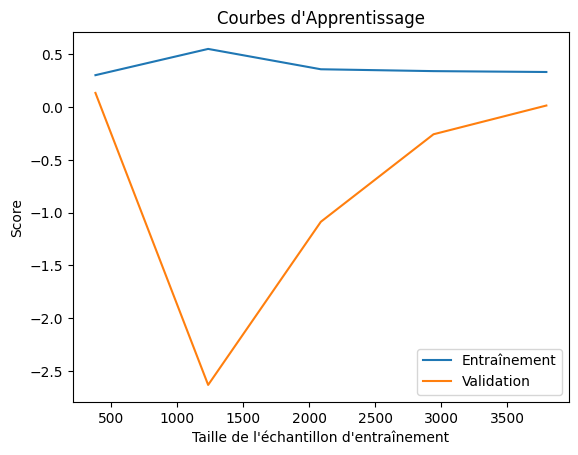

In [81]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(regressor, x, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Entraînement')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Score')
plt.title('Courbes d\'Apprentissage')
plt.legend()
plt.show()

**Regularization**

In [82]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_r = ridge.predict(x_test)

In [83]:
# Calcul de la Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_r)
print(f"Mean Squared Error (MSE): {mse}")

# Définition de la fonction pour calculer la Root Mean Squared Error (RMSE)
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Calcul du RMSE
rmse_value = rmse(y_test, y_pred_r)
print(f"Root Mean Squared Error (RMSE): {rmse_value}")

# Calcul de la Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_r)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcul du R2 Score
r2 = r2_score(y_test, y_pred_r)
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 1906618847.9355068
Root Mean Squared Error (RMSE): 43664.84682139062
Mean Absolute Error (MAE): 22432.614159019115
R2 Score: 0.5215968821553413


In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_l = lasso.predict(x_test)

# Calcul de la Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_l)
print(f"Mean Squared Error (MSE): {mse}")

# Définition de la fonction pour calculer la Root Mean Squared Error (RMSE)
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Calcul du RMSE
rmse_value = rmse(y_test, y_pred_l)
print(f"Root Mean Squared Error (RMSE): {rmse_value}")

# Calcul de la Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_l)
print(f"Mean Absolute Error (MAE): {mae}")

# Calcul du R2 Score
r2 = r2_score(y_test, y_pred_l)
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 1906568845.7834003
Root Mean Squared Error (RMSE): 43664.27425004795
Mean Absolute Error (MAE): 22441.31238097173
R2 Score: 0.5216094285462953


**try KNN**

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)  # Standardiser les données d'entraînement
X_test_scaled = scaler.transform(x_test)  # Standardiser les données de test

In [96]:
k = 19 # Choisissez la valeur de k
knn = KNeighborsRegressor(n_neighbors=k)  # Création du modèle KNN pour la régression
knn.fit(X_train_scaled, y_train)  # Entraînement du modèle


KNeighborsRegressor(n_neighbors=19)

In [97]:
y_pred = knn.predict(X_test_scaled)  # Prédictions sur les données de test

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination R^2

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1326307925.19
R² Score: 0.67


**Try polynomiale**

In [121]:
# Transformer les caractéristiques en polynômes de degré 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [122]:
# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [123]:
# Prédire sur les données de test
y_pred = model.predict(X_test_poly)

# Calculer et afficher l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("Erreur quadratique moyenne sur les données de test :", mse)


Erreur quadratique moyenne sur les données de test : 796969654.5679597


In [124]:
r2 = r2_score(y_test, y_pred)
print("Coefficient de détermination R^2 sur les données de test :", r2)

Coefficient de détermination R^2 sur les données de test : 0.8000267499790343


***meilleur modele est le polynomiale de degré 2***